# Análise de Clusters

## Aplicando o K-means

In [1]:
# importando e carregando bibliotecas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

%matplotlib inline
rcParams['figure.figsize'] = 8, 7
plt.style.use('seaborn-whitegrid')

In [2]:
# carregando dataset
iris = datasets.load_iris()
X = scale(iris.data)
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
var_names = iris.feature_names
iris_df = pd.DataFrame(iris.data)
iris_df.columns = var_names

### Construindo e executando o modelo

In [3]:
clustering = KMeans(n_clusters=3, random_state=5).fit(X)
clustering

KMeans(n_clusters=3, random_state=5)

### Plotando o resultado do modelo

Text(0.5, 1.0, 'Resultado KMeans')

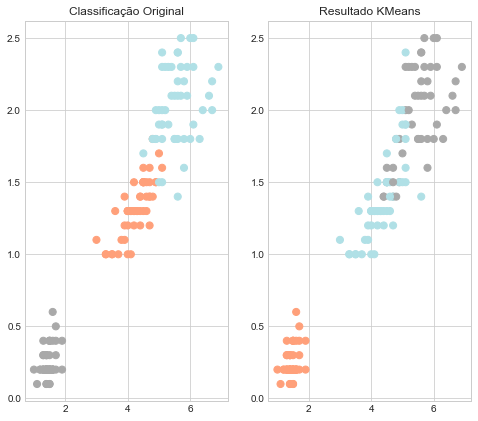

In [6]:
cores = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1, 2, 1)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
           c = cores[iris.target],
           s = 50)
plt.title('Classificação Original')

plt.subplot(1, 2, 2)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
           c = cores[clustering.labels_],
           s = 50)
plt.title('Resultado KMeans')

Text(0.5, 1.0, 'Resultado KMeans')

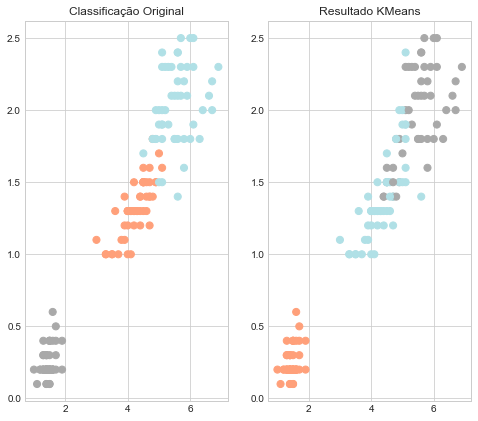

In [7]:
relabel = np.choose(clustering.labels_, [2,0,1]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
           c = cores[iris.target],
           s = 50)
plt.title('Classificação Original')

plt.subplot(1, 2, 2)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
           c = cores[clustering.labels_],
           s = 50)
plt.title('Resultado KMeans')

In [9]:
## Avaliando a clusterização resultante
metricas = classification_report(y, relabel)
print(metricas)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



## Métodos Hierárquicos

In [11]:
# importando bibliotecas
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10,3))
mtcars = pd.read_csv('mtcars.csv')
mtcars.rename(columns = {'Unnamed: 0' : 'modelo'}, inplace = True)

X = mtcars[['mpg', 'disp', 'hp', 'wt']].values
y = mtcars['am'].values

<Figure size 720x216 with 0 Axes>

### Usando Scipy para gerar Dendrogramas

In [12]:
z = linkage(X, 'ward')

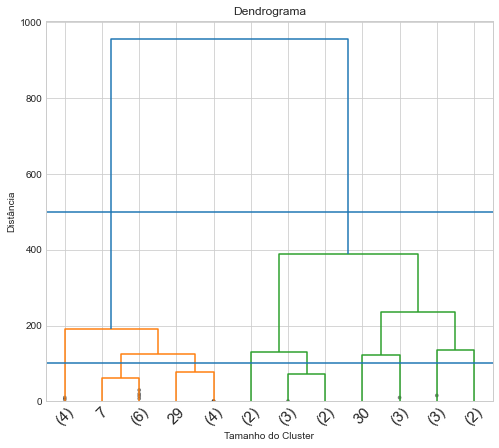

In [14]:
dendrogram(z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)

plt.title('Dendrograma')
plt.xlabel('Tamanho do Cluster')
plt.ylabel('Distância')

plt.axhline(y=500)
plt.axhline(y=100)
plt.show()

## Gerando Clusters Hierárquicos

In [15]:
k = 2

hclusters = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
accuracy_score(y, hclusters.labels_)

0.78125

In [16]:
hclusters = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete').fit(X)
accuracy_score(y, hclusters.labels_)

0.4375

In [17]:
hclusters = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average').fit(X)
accuracy_score(y, hclusters.labels_)

0.78125

In [18]:
hclusters = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average').fit(X)
accuracy_score(y, hclusters.labels_)

0.71875

## Aprendizado com KNN

In [21]:
# importando e carregando bibliotecas
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns

np.set_printoptions(precision=4, suppress=True)
%matplotlib inline
rcParams['figure.figsize'] = 8,7
sns.set_style('whitegrid')

mtcars.rename(columns = {'Unnamed: 0' : 'modelo'}, inplace = True)

X = mtcars[['mpg', 'disp', 'hp', 'wt']].values
y = mtcars['am'].values

### Dividindo os dados em treino e teste

In [22]:
X = preprocessing.scale(X)

In [23]:
X_treino, X_teste, y_treino,y_teste = train_test_split(X, y, test_size= .30, random_state=17)

### Treinando o modelo

In [24]:
clf = KNeighborsClassifier()
clf.fit(X_treino, y_treino)

print(clf)

KNeighborsClassifier()


## Avaliando o desempenho do Modelo com os dados de teste

In [25]:
y_esperado = y_teste
y_predito = clf.predict(X_teste)

print(classification_report(y_esperado, y_predito))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.67      0.80         6

    accuracy                           0.80        10
   macro avg       0.83      0.83      0.80        10
weighted avg       0.87      0.80      0.80        10

